In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

A. LOAD DATA.

In [16]:
train_path_female = 'Dataset/Female/'
train_path_male = 'Dataset/Male/'

B. PREPROCESS DATA.

In [17]:
IMAGE_SIZE = 224

In [ ]:
from torchvision import transforms
from PIL import Image

In [ ]:
import os

transforms_aug = transforms.Compose([transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

folder_path = 'E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Final Project\Dataset\Female\Ratu'

save_path = 'E:\TEKNIK INFORMATIKA\Semester 6\Deep Learning\Final Project\Dataset\New'

if not os.path.exists(save_path):
    os.mkdir(save_path)

for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png') or file_name.endswith('.JPG'):
        
        img = Image.open(os.path.join(folder_path, file_name))
        
        
        img_aug = transforms_aug(img)
        
        
        file_name_aug = os.path.splitext(file_name)[0] + '_Flip' + os.path.splitext(file_name)[1]
        img_aug.save(os.path.join(save_path, file_name_aug))

Generate data training dan validation menggunakan ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

Load data training dan validation

In [19]:
train_female_generator = train_datagen.flow_from_directory(
    train_path_female,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_female_generator = train_datagen.flow_from_directory(
    train_path_female,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

train_male_generator = train_datagen.flow_from_directory(
    train_path_male,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_male_generator = train_datagen.flow_from_directory(
    train_path_male,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 155 images belonging to 1 classes.
Found 38 images belonging to 1 classes.
Found 104 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


C. CREATE MODEL.

Model untuk gender

In [20]:
gender_model = Sequential()
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in vgg16.layers:
    gender_model.add(layer)

gender_model.add(Flatten())

gender_model.add(Dense(256, activation='relu'))
gender_model.add(Dropout(0.5))
gender_model.add(Dense(1, activation='sigmoid'))

gender_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model untuk person

In [21]:
person_model = Sequential()
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in vgg16.layers:
    person_model.add(layer)

person_model.add(Flatten())

person_model.add(Dense(256, activation='relu'))
person_model.add(Dropout(0.5))
person_model.add(Dense(1, activation='sigmoid'))

person_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Training model gender

In [22]:
gender_model.fit(
    train_male_generator,
    epochs=10,
    validation_data=val_male_generator
)

Epoch 1/10
4/4 [==============================] - 58s 13s/step - loss: 0.1830 - accuracy: 0.8846 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 54s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 61s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 60s 14s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 62s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 62s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 62s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

Training model person

In [23]:
person_model.fit(
    train_female_generator,
    epochs=10,
    validation_data=val_female_generator
)

Epoch 1/10
5/5 [==============================] - 122s 19s/step - loss: 0.1978 - accuracy: 0.8710 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 93s 18s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 93s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 94s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 94s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 95s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 94s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+

Menggabungkan kedua model menjadi 1

In [24]:
combined_model = Sequential()
for layer in vgg16.layers:
    combined_model.add(layer)

combined_model.add(Flatten())

combined_model.add(Dense(256, activation='relu'))
combined_model.add(Dropout(0.5))
combined_model.add(Dense(2, activation='sigmoid'))


Compile model gabungan

In [25]:
combined_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Melakukan training untuk model gabungan

In [26]:
combined_model.fit(
    train_datagen.flow_from_directory(
        'Dataset',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
    ),
    epochs=10,
    validation_data=train_datagen.flow_from_directory(
        'Dataset',
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
    )
)

Found 323 images belonging to 2 classes.
Found 323 images belonging to 2 classes.
Epoch 1/10
11/11 [==============================] - 260s 24s/step - loss: 4731179.5000 - accuracy: 0.5511 - val_loss: 1.3846 - val_accuracy: 0.4025
Epoch 2/10
11/11 [==============================] - 265s 24s/step - loss: 1.2837 - accuracy: 0.4675 - val_loss: 0.6289 - val_accuracy: 0.5975
Epoch 3/10
11/11 [==============================] - 260s 24s/step - loss: 0.5849 - accuracy: 0.7307 - val_loss: 0.3323 - val_accuracy: 0.9350
Epoch 4/10
11/11 [==============================] - 282s 26s/step - loss: 0.3008 - accuracy: 0.9133 - val_loss: 0.1848 - val_accuracy: 0.9381
Epoch 5/10
11/11 [==============================] - 294s 27s/step - loss: 0.4675 - accuracy: 0.8483 - val_loss: 0.3498 - val_accuracy: 0.8762
Epoch 6/10
11/11 [==============================] - 262s 24s/step - loss: 0.5011 - accuracy: 0.8142 - val_loss: 0.1809 - val_accuracy: 0.9598
Epoch 7/10
11/11 [==============================] - 238s 22s

D. VISUALIZATION.

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 468ms/step
Gender:  Male
Name:  Fitrah


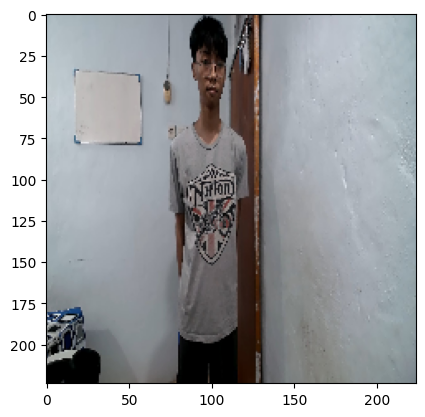

In [28]:
label_map = {0: 'Male', 1: 'Female'}

img = image.load_img('Dataset/WIN_20230620_20_53_26_Pro.jpg', target_size=(IMAGE_SIZE, IMAGE_SIZE))

plt.imshow(img)

img_array = image.img_to_array(img)

result = combined_model.predict(np.array([img_array]))

gender = label_map[np.argmax(result)]
if gender == 'Female':
    name = 'Ratu'
else:
    name = 'Fitrah'

print("Gender: ", gender)
print("Name: ", name)